Notebook notes: initial notebook used to visualize ground truth images

In [52]:
import glob
import pickle
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt

In [4]:
filepath = "../../../segmentation_ground_truth"
file_list = glob.glob(filepath + '/*.p')

In [8]:
with open(file_list[0], 'rb') as f:
    loaded = pickle.load(f)

In [49]:
loaded.keys()

dict_keys(['image', 'masks'])

In [59]:
inputs = torchvision.transforms.ToTensor()(loaded['image'].resize((175, 175)))

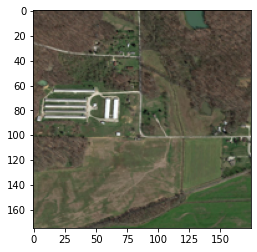

In [60]:
plt.imshow(inputs.permute(1, 2, 0))

In [69]:
torch.Tensor(loaded['masks']['Lagoon']).shape

torch.Size([1024, 1024])

In [47]:
lagoon = F.interpolate(torch.Tensor(loaded['masks']['Lagoon']).unsqueeze(0).unsqueeze(0),size=(175, 175)).reshape(175, 175)
cafo = F.interpolate(torch.Tensor(loaded['masks']['CAFO Shed']).unsqueeze(0).unsqueeze(0),size=(175, 175)).reshape(175, 175)
bg = F.interpolate(torch.Tensor(loaded['masks']['BACKGROUND']).unsqueeze(0).unsqueeze(0),size=(175, 175)).reshape(175, 175)
mask = torch.stack([lagoon, cafo, bg])

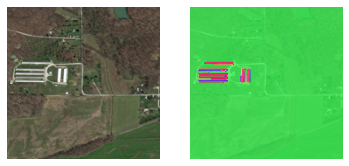

In [63]:
f = plt.figure()
a = f.add_subplot(1, 2, 1)
plt.imshow(inputs.permute(1, 2, 0).cpu().numpy())
kwarg_dict = {'CAFO Shed': {'cmap':'prism', 'alpha': 0.5},
              'Lagoon': {'cmap':'cool', 'alpha': 0.5},
              'BACKGROUND': {'cmap':'hot', 'alpha': 0.0}}
plt.axis('off')
a = f.add_subplot(1, 2, 2)
plt.imshow(inputs.permute(1, 2, 0).cpu().numpy())
plt.imshow(mask[0].numpy(), **kwarg_dict['BACKGROUND'])
plt.imshow(mask[1].numpy(), **kwarg_dict['Lagoon'])
plt.imshow(mask[2].numpy(), **kwarg_dict['CAFO Shed'])    
plt.axis('off')
plt.show()

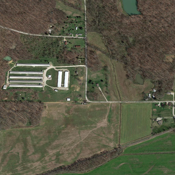

In [12]:
loaded['image'])